# Downloading data

In [609]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [610]:
# Download CIFAR10 train dataset 
train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())

# Download CIFAR10 test dataset
dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

Files already downloaded and verified


# Analysing the data

Below code gives the classes represented in the images.

In [611]:
classes = train_dataset.classes
print(classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We use train_test_split from sklearn that splits the dataset into test and validation datasets.
 
The train dataset contains 50000 data points. Similarly validation and test datasets contain 4500 and 5500 data points.

In [612]:
# Split the dataset into validation and test sets
val_dataset, test_dataset = train_test_split(dataset, train_size = .45, shuffle=True)
print("length of train, validation and test datasets:", len(train_dataset), len(val_dataset),len(test_dataset))

length of train, validation and test datasets: 50000 4500 5500


CIFAR10 train dataset has 50000 samples where each sample is a tuple with two elements. First element represents the image of size [3,32,32] and second element gives the actual label(number between 0 to 9) representing the class given in the image. For example, label 5 represents dog.

In [613]:
# Evaluating the train data
print("Value of first element of train dataset:", type(train_dataset[0]),len(train_dataset[0]))
print("Value of second element of train dataset:",type(train_dataset[1]),len(train_dataset[1]))

Value of first element of train dataset: <class 'tuple'> 2
Value of second element of train dataset: <class 'tuple'> 2


In [614]:
print("First element:", train_dataset[0])

First element: (tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.

In [615]:
print("Image representation of the first element of train dataset:", type(train_dataset[0][0]),train_dataset[0][0].size())
print("Label of the first element of train dataset:", type(train_dataset[0][1]), train_dataset[0][1])

Image representation of the first element of train dataset: <class 'torch.Tensor'> torch.Size([3, 32, 32])
Label of the first element of train dataset: <class 'int'> 6


Label (numeric): 6
Label (textual): frog


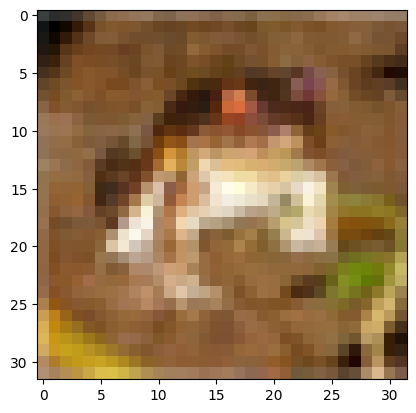

In [616]:
img, label = train_dataset[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [617]:
# Evaluating the test data
print("Image representation of the first test element:", type(test_dataset[0][0]),test_dataset[0][0].size())
print("Label of the first test element:", type(test_dataset[0][1]), test_dataset[0][1])

Image representation of the first test element: <class 'torch.Tensor'> torch.Size([3, 32, 32])
Label of the first test element: <class 'int'> 7


Label (numeric): 7
Label (textual): horse


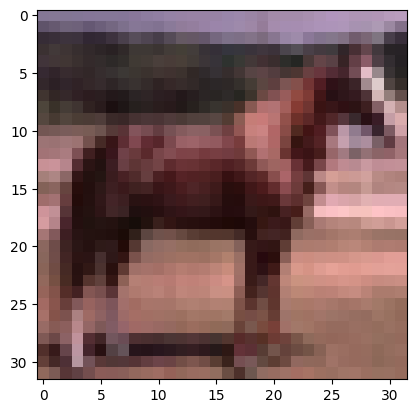

In [618]:
img, label = test_dataset[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

# Initializations

CIFAR10 datasets are added to dataloaders to create batches of 100 samples to be used at a time. As train dataset is of 50000 samples, dataloader creates batches of 100 samples. In each iteration/epoch that runs over the whole dataset of 50000 samples once, this means that after every 100 samples batch, model's weight is updated. This is carried out 500 times. So in each epoch model's weight is updated 500 times (50000/100). 

If you consider the batch size of 50000 samples, then the model's weight is updated only once in each epoch, which is not a good practice as model is getting less trained.

In [619]:
# Adding dataset to dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1000)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=100)
print("Elements in train, validation and test loaders at a time:",len(train_loader),len(val_loader),len(test_loader))

Elements in train, validation and test loaders at a time: 50 45 55


Since an image is of the size 3X32X32, hence we consider input dimension of each image to be 3X32X32.

The output of each image is a vector with the predicted probability of each number from 0 to 9. The predicted label would be the number with the highest probability. Hence the output dimension is considered as 10. 

In [620]:
# Initializations
epochs = 10
input_dim = 3*32*32
output_dim = 10
learning_rate = 0.001
hidden_dim = 256

# Training and validating the model

For image classification here, we use Neural Network model. Conv2d implements convolutional neural network (CNN). It takes as argument 3 as it represents that we use a colored image and in RGB format. 32 is the output value. Rest takes care of the extra conditions. 

The final output returned is of size 10 which means that it gives the probability for each of the 10 image classes. The class with highest probability represents that particular image.

In [621]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.BatchNorm2d(256),

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)


Mean squared error (MSE) loss used for linear regression is not useful in case of classification as it makes the whole function non-convex. It is difficult to find global minimum in case of non-convex functions. Here, we use cross entropy loss.

In pytorch, in case of multi-class classification as required in this example, CrossEntropyLoss() is used. 

We use Adam which updates the model parameters after computing their gradients

In [622]:
model = NeuralNetwork()
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

The image part of an element of the train loader is of size [100,3,32,32]. 

In [623]:
#Each epoch runs over the complete dataset once.
for epoch in range(epochs):
    total = 0
    correct = 0
    losses = 0
    iter = 0

    #Batch of 100 samples
    for images,labels in train_loader:
        #Predict the output using model function
        outputs = model(images)
        #Clear the gradients of the parameters
        optimizer.zero_grad()
        #Compute loss
        loss = criterion(outputs, labels) 
        #Back propagate the loss and calculate the gradients of the parameters
        loss.backward() 
        #Update parameters using SGD
        optimizer.step() 
        iter+=1
    
        # Calculating the loss and accuracy on the train dataset
        with torch.no_grad():
            predictions = model(images)
            #Considers the value with the highest probability for a sample
            _,value = torch.max(predictions, dim=1)
            total += labels.size()[0]
            losses += loss.item()
            correct += torch.sum(value == labels).item()
    accuracy = 100 * correct/total
    final_loss = losses/iter
    print(f"[{epoch}, {iter:5d}] Train -  Loss: {final_loss}. Accuracy: {accuracy}\n")
        
    val_total=0
    val_correct=0
    val_losses=0
    iter_val=0
    # Calculating the loss and accuracy on the validation dataset
    with torch.no_grad():
        for images_val,labels_val in val_loader:
            outputs_val = model(images_val)
            _,value_val = torch.max(outputs_val, dim=1)
            
            val_total += labels_val.size()[0]
            val_loss = criterion(outputs_val,labels_val)
            val_losses += val_loss.item()
            val_correct += torch.sum(value_val == labels_val).item()
            iter_val+=1
    accuracy_val = 100 * val_correct/val_total
    final_loss_val = val_losses/iter_val
    print(f"[{epoch}, {iter_val:5d}] Val -  Loss: {final_loss_val}. Accuracy: {accuracy_val}\n")


[0,    50] Train -  Loss: 1.4326955151557923. Accuracy: 51.32

[0,    45] Val -  Loss: 1.041382748550839. Accuracy: 62.24444444444445

[1,    50] Train -  Loss: 0.8761882448196411. Accuracy: 72.26

[1,    45] Val -  Loss: 0.783145542939504. Accuracy: 72.86666666666666

[2,    50] Train -  Loss: 0.6013857477903366. Accuracy: 82.472

[2,    45] Val -  Loss: 0.6865330908033583. Accuracy: 76.82222222222222

[3,    50] Train -  Loss: 0.4429518288373947. Accuracy: 88.938

[3,    45] Val -  Loss: 0.7351026905907525. Accuracy: 76.46666666666667

[4,    50] Train -  Loss: 0.34095784306526183. Accuracy: 93.116

[4,    45] Val -  Loss: 0.7640696843465169. Accuracy: 76.0

[5,    50] Train -  Loss: 0.25106945604085923. Accuracy: 96.01

[5,    45] Val -  Loss: 0.7867335120836894. Accuracy: 77.88888888888889

[6,    50] Train -  Loss: 0.17758753761649132. Accuracy: 97.978

[6,    45] Val -  Loss: 0.8097810016738044. Accuracy: 78.02222222222223

[7,    50] Train -  Loss: 0.11476083114743232. Accuracy:

# Save the model

In [636]:
#Save the model using state_dict() to file named "cifar10_logistic.pth"
torch.save(model.state_dict(), 'cifar10_logistic.pth')

#Create a new instance of the class CNN Neural Network and load the previous model from the saved file.
model_log = NeuralNetwork()
model_log.load_state_dict(torch.load('cifar10_logistic.pth'))

<All keys matched successfully>

# Test the model on test dataset

In [628]:
#Calculate loss and accuracy of the test dataset using saved model
test_total=0
test_correct=0
test_losses=0
iter_test=0
with torch.no_grad():
    for images_test,labels_test in test_loader:
        # images_test = images_test.view(-1, 28*28).requires_grad_()
        outputs_test = model(images_test)
        _,value_test = torch.max(outputs_test, dim=1)
        
        test_total += labels_test.size()[0]
        test_loss = criterion(outputs_test,labels_test)
        test_losses += test_loss.item()
        test_correct += torch.sum(value_test == labels_test).item()
        # print("iter",epoch,iter_test)
        iter_test+=1
accuracy_test = 100 * test_correct/test_total
final_loss_test = test_losses/iter_test
print(f"[{epoch}, {iter_test:5d}] Test -  Loss: {final_loss_test}. Accuracy: {accuracy_test}\n")


[9,    55] Test -  Loss: 0.9537696117704565. Accuracy: 80.63636363636364

